In [1]:
%load_ext autoreload
%autoreload 2
import genericIO
import SepVector
import Hypercube
import numpy as np
import Operator
import time

In [2]:
n1 = 500
n2 = 170
o1 = -10
o2 = -10
d1 = abs(2*o1/(n1-1))
d2 = abs(2*o2/(n2-1))

n2new = 11
d2new = (n2-1)*d2 / (n2new - 1)
n1new = 51
d1new = (n1-1)*d1 / (n1new - 1)

print(d2,d2new)

data = SepVector.getSepVector(Hypercube.hypercube(ns=[n1,n2],ds=[d1,d2],os=[o1,o2]),storage='dataComplex')
model = SepVector.getSepVector(Hypercube.hypercube(ns=[n1new,n2new],ds=[d1new,d2new],os=[o1,o2]),storage='dataComplex')


0.11834319526627218 2.0


Constructor: 0.000680
Forward: 0.004097
83996.2701378136
(1.0000004+0j)
(0.98862785+0j)


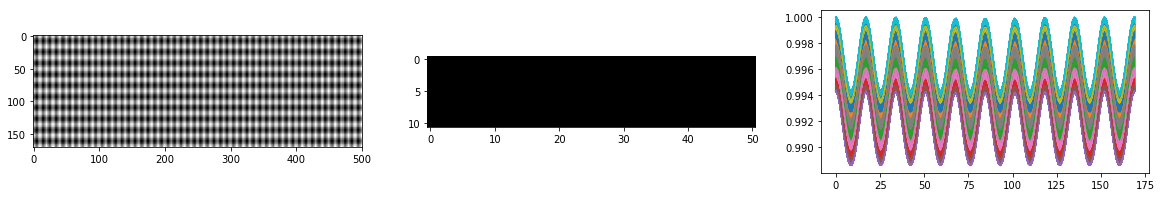

In [3]:
modNd = model.getNdArray()
x = np.linspace(o1,o1+(n1new-1)*d1new,n1new)
y = np.linspace(o2,o2+(n2new-1)*d2new,n2new)
xx = np.linspace(o1,o1+(n1-1)*d1,n1)
yy = np.linspace(o2,o2+(n2-1)*d2,n2)

ss = np.outer(np.sin(x*x),np.sin(y*y))
true = np.sin(xx*xx)
# modNd[:,0,0] = ss[::int(n3/n3new+1)]
modNd[:] = 1
# modNd[int((n2new-1)/2),int((n1new-1)/2)] = 1
# modNd[0,int((n1new-1)/2)] = 1
modNd[1,int((n1new-1)/2)] = 1
modNd[8,int((n1new-1)/2)] = 1
# modNd[:].imag = 0
    

start = time.time()
filt = Operator.LanczosInterpolation2D(model,data,a=[3,3])
print('Constructor: %f' % (time.time() - start))

start = time.time()
filt.forward(False,model,data)
print('Forward: %f' % (time.time() - start))

datNd = data.getNdArray()

print(data.dot(data))
print(np.amax(datNd))
print(np.amin(datNd))

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=[20,3])
ax[0].imshow(datNd.real,cmap='gray')
ax[1].imshow(modNd.real,cmap='gray')
ax[2].plot(datNd.real)

plt.show()

Constructor: 0.000436
Forward: 0.002021
85000.01389598234
(1.0000026+0j)
(0.9999942+0j)


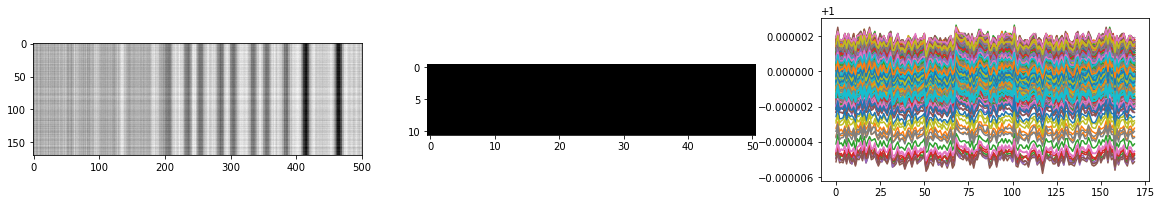

In [4]:
start = time.time()
filt = Operator.Spline2D(model,data,type='CR-spline')
print('Constructor: %f' % (time.time() - start))

start = time.time()
filt.forward(False,model,data)
print('Forward: %f' % (time.time() - start))

datNd = data.getNdArray()

print(data.dot(data))
print(np.amax(datNd))
print(np.amin(datNd))

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=[20,3])
ax[0].imshow(datNd.real,cmap='gray')
ax[1].imshow(modNd.real,cmap='gray')
ax[2].plot(datNd.real[:,:])

plt.show()

In [5]:
np.sum(np.sum(datNd))

(85000+0j)

Adjoint: 0.002012


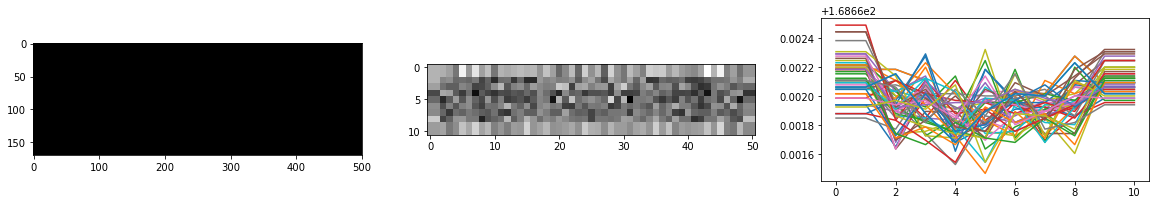

In [6]:

data.zero()
model.zero()
datNd[0,int(n1/2)] = 1
datNd[100,int(n1/2)] = 1

datNd[:] = 1

start = time.time()
filt.adjoint(False,model,data)
print('Adjoint: %f' % (time.time() - start))

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3,figsize=[20,3])
ax[0].imshow(datNd.real,cmap='gray')
ax[1].imshow(modNd.real,cmap='gray')
ax[2].plot(modNd.real[:,:])
# ax[2].set_ylim([0,201])
# ax[2].set_xlim([0,2])

plt.show()

In [7]:
print(np.amax(modNd))
print(np.amin(modNd))

(168.66249+0j)
(168.66147+0j)


In [8]:
modNd.real[1,:]

array([168.66219, 168.66219, 168.66217, 168.66211, 168.66194, 168.66245,
       168.66208, 168.66238, 168.66211, 168.66223, 168.66194, 168.66219,
       168.66216, 168.66219, 168.66222, 168.66219, 168.6622 , 168.66206,
       168.66225, 168.66211, 168.66188, 168.66202, 168.66222, 168.66188,
       168.6623 , 168.66205, 168.6622 , 168.66185, 168.66231, 168.66205,
       168.66194, 168.66222, 168.66211, 168.66199, 168.6623 , 168.66226,
       168.66228, 168.6621 , 168.6622 , 168.6621 , 168.66205, 168.66202,
       168.66212, 168.66249, 168.66219, 168.66245, 168.66199, 168.66211,
       168.66193, 168.66206, 168.66206], dtype=float32)

In [9]:
filt.dotTest(verbose=True)

Dot-product test of forward and adjoint operators
-------------------------------------------------
Applying forward operator add=False
 Runs in: 0.002310037612915039 seconds
Applying adjoint operator add=False
 Runs in: 0.002540111541748047 seconds
Dot products add=False: domain=1.491856e+01 range=1.066097e+01 
Absolute error: 4.257592e+00
Relative error: 3.993625e-01 



Warning: 	Dot products failure add=False; relative error 3.99e-01 is greater than tolerance 1.00e-04